<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Session_10_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

#Session-10: Simple Linear Regression



###Objective: 
 1. Implement Linear Regression from scratch.
 2. Introduce with Scikit Learn Library 
 3. Apply linear regression algorithm on a real world dataset.
 



In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

#Simple Linear Regression

##Dataset

In [ ]:
# Download the data
!wget -O Salary_Data.csv https://www.dropbox.com/s/qq08pgcg9vbbztr/Salary_Data.csv?dl=0

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('Salary_Data.csv')
dataset.head(5)

In [ ]:
# independent variable  or input feature
feature = dataset[['YearsExperience']]  

# dependent variable or output
target = dataset[['Salary']] 

In [ ]:
feature

pandas.core.frame.DataFrame

In [ ]:
target

##Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
X_train.values

In [ ]:
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (24, 1)
Test Set Size: (6, 1)


In [ ]:
X_test

#Implementation from scratch

**The simplest form** of the regression equation with one dependent and one independent variable.

$$h_\theta(x) = \theta_0+\theta_1x$$

where,

- $h_\theta(x)$ = estimated dependent value.
- $\theta_0$ = constant or bias.
- $\theta_1$ = regression coefficient or slope.
- $x$ = value of the independent variable.

**The cost function (or loss function)** is used to measure the performance of a machine learning model or quantifies the error between the expected values and the values predicted by our hypothetical function ($h_\theta$). The cost function for Linear Regression is represented by $J$.

$$J(\theta_0,\theta_1) = \frac{1}{2m}∑_{i=1}^m (h_\theta(x^{(i)}-y^{(i)})^2$$

- Here, $m$ is the total number of training examples in the dataset.
- $y^{(i)}$ represents the value of target variable for $i^{th}$ training example.

So, our **objective** is to **minimize the cost function** $J$ (or improve the performance of our machine learning model). To do this, we have to find the weights ($\theta_0, \theta_1$) at which $J$ is minimum.  One such algorithm which can be used to minimize any differentiable function is **Gradient Descent**. It is a first-order iterative optimizing algorithm that takes us to a minimum of a function.

# Steps to Implement Gradient Descent

**Step-1 Initializing the parameters**

Here, we need to initialize the values for our parameters. Let’s keep $\theta_0 = 0$ and $\theta_1 = 0$.

We will also need a **learning rate** to determine the step size at each iteration while moving toward a minimum value of our loss function.

**Step -2 Calculate the Partial Derivatives with respect to parameters**

Here we partially differentiate our loss function with respect to the parameters we have.


$$\frac{\partial J}{\partial \theta_0} = \frac{1}{m}∑_{i=1}^m ((\theta_0+\theta_1x^{(i)})-y^{(i)})$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m}∑_{i=1}^m ((\theta_0+\theta_1x^{(i)})-y^{(i)}).x^{(i)}$$



**Step – 3 Updating the parameters**

Now, we update the values of our parameters using the equations given below

$$\theta_0 = \theta_0 - lr.\frac{\partial J}{\partial \theta_0} $$
$$\theta_1 = \theta_1 - lr.\frac{\partial J}{\partial \theta_1} $$

In [ ]:
# Linear Regression
  
class LinearRegression() :
      
    def __init__( self, lr, iter ) :
          
        self.learning_rate = lr   
        self.iterations = iter
          
    # Function for model training           
    def fit(self, X, Y ) :
          
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
          
        # weight initialization
        self.theta_1 = np.zeros(self.n) 
        self.theta_0 = 0
        self.X = X   
        self.Y = Y
             
        # gradient descent learning
                  
        for i in range(self.iterations) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  

        dtheta_1 = (1/self.m)*sum(self.X * (Y_pred - self.Y))
        dtheta_0 = (1/self.m)*sum(Y_pred-self.Y)
      
        # dtheta_1 = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        # dtheta_0 = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.theta_1 = self.theta_1 - self.learning_rate * dtheta_1
        self.theta_0 = self.theta_0 - self.learning_rate * dtheta_0
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict(self, X) :
      
        return self.theta_1* X + self.theta_0

In [ ]:
model = LinearRegression(lr = 0.01, iter = 1000 )
  
model.fit(X_train.values, y_train.values )
      
# Prediction on test set
  
y_pred = model.predict(X_test )
      
print( "Predicted values\n ", np.round( y_pred[:3].values, 2 ) )       
print( "Real values      \n", y_test[:3].values )      
print( "Trained theta_1        ", round( model.theta_1[0], 2 ) )      
print( "Trained theta_0        ", round(model.theta_0[0],2) )

Predicted values
  [[ 38249.04]
 [124747.49]
 [ 63805.4 ]]
Real values      
 [[ 37731.]
 [122391.]
 [ 57081.]]
Trained theta_1         9829.37
Trained theta_0         23504.99


#Linear Regression using Scikit learn

In [ ]:
# Fitting a simple linear regression to Training Set
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()

# fit the regressor on training dataset
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting the Test set Results
y_pred = regressor.predict(X_test)
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [ ]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0


In [ ]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [ ]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0


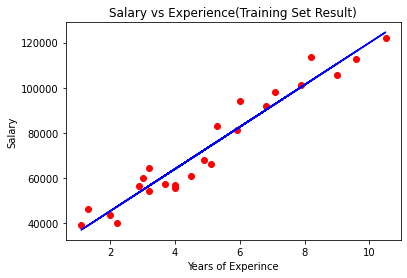

In [ ]:
# Visualization the training Set Results

plt.scatter(X_train, y_train, color = 'red')
# this line is for the regressor line 
plt.plot(X_train,regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience(Training Set Result)')
plt.xlabel('Years of Experince')
plt.ylabel('Salary')
plt.show()


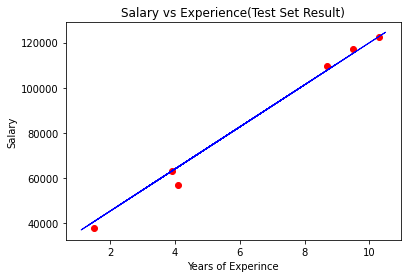

In [ ]:
# Visualization the testing Set Results

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue',linewidth=1)
plt.title('Salary vs Experience(Test Set Result)')
plt.xlabel('Years of Experince')
plt.ylabel('Salary')
plt.show()


##Evaluation Metrices

1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. R-Squared Error

In [ ]:
from sklearn.metrics import mean_absolute_error

# MAE
mean_absolute_error(y_test, y_pred)

2446.1723690465055

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

12823412.298126549


In [ ]:
def mse(y_test,y_pred):
  

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.988169515729126

In [ ]:
dataset

In [ ]:
regressor.predict([[10.4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[123630.88046861]])

#Reference


1.   [SuperDataScience](https://www.superdatascience.com/pages/machine-learning)

2.   [GeeksforGeeks](https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/)

